In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as dates
import mpl_finance as candle
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from pylab import rcParams


%matplotlib inline

# Pega blue chips de 2017

In [4]:
blue_chips = pd.read_csv('BLUECHIPS2017')

# Cria planilha contendo fechamento das 100 empresas

In [68]:
df_relacoes = pd.DataFrame()
for blue_chip in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
    df_relacoes[blue_chip] = pd.read_csv('HISTORICO_2017/' + blue_chip + '_2017')['PRECO FECHAMENTO']

df_relacoes

,PETR4,ITUB4,VALE3,BBDC4,ABEV3,BBAS3,BVMF3,CIEL3,ITSA4,KROT3,...,OIBR3,PDGR3,ABCB4,BRPR3,TUPY3,SLCE3,GUAR3,CGAS5,AALR3,DIRR3
0,14.66,33.53,25.06,28.80,16.31,27.54,16.28,27.25,8.21,13.30,...,2.64,1.52,13.31,7.47,12.44,14.66,57.52,46.70,14.60,4.61
1,15.50,34.95,26.17,30.00,16.64,28.80,16.95,28.01,8.57,13.96,...,2.65,1.37,13.88,7.67,12.57,14.76,60.20,46.95,14.90,4.93
2,15.50,35.10,25.70,29.81,16.51,28.65,17.27,27.61,8.62,13.88,...,2.62,1.43,14.28,8.00,12.40,15.25,60.00,47.30,14.90,4.93
3,15.75,35.58,26.68,30.14,16.60,28.58,17.06,27.31,8.70,13.70,...,2.67,1.50,14.51,8.05,12.61,15.67,61.32,46.91,15.35,4.83
4,15.66,35.70,25.97,30.33,16.46,28.89,17.05,27.37,8.67,13.60,...,2.68,1.49,14.65,7.97,12.86,15.66,59.50,45.82,15.45,4.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,15.86,42.73,39.73,33.97,20.97,31.19,22.28,23.10,10.95,17.67,...,3.50,2.23,16.03,10.86,18.55,25.64,149.90,58.13,14.60,5.36
242,15.75,42.53,39.79,34.07,21.03,31.30,22.29,23.12,10.96,17.81,...,3.60,2.22,16.35,10.86,18.77,25.99,149.80,59.00,15.08,5.38
243,15.97,42.70,39.85,33.31,21.25,31.64,22.36,23.39,10.84,17.80,...,3.82,2.23,16.49,10.61,18.40,26.14,149.21,60.64,15.03,5.45
244,16.05,42.47,39.86,33.35,21.40,32.03,22.67,23.51,10.81,18.21,...,3.71,2.26,16.71,10.67,18.21,26.40,148.90,58.80,15.12,5.59


# Gera as correlações

In [69]:
corr_pearson = df_relacoes.corr(method='pearson')
corr_kendall = df_relacoes.corr(method='kendall')
corr_spearman = df_relacoes.corr(method='spearman')

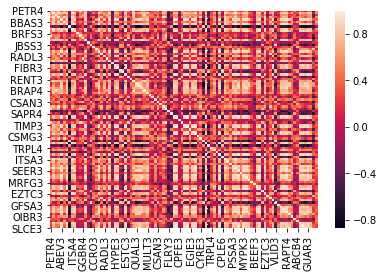

In [70]:
sns.heatmap(corr_pearson)

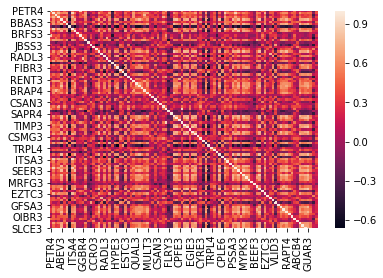

In [71]:
sns.heatmap(corr_kendall)

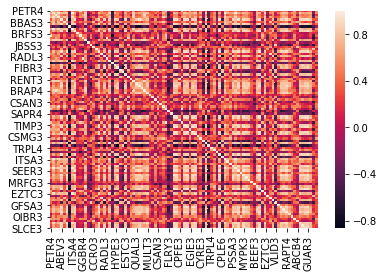

In [72]:
sns.heatmap(corr_spearman)

In [73]:
corr_spearman

,PETR4,ITUB4,VALE3,BBDC4,ABEV3,BBAS3,BVMF3,CIEL3,ITSA4,KROT3,...,OIBR3,PDGR3,ABCB4,BRPR3,TUPY3,SLCE3,GUAR3,CGAS5,AALR3,DIRR3
PETR4,1.000000,0.662357,0.568528,0.721106,0.327830,0.595797,0.389362,-0.172257,0.637321,0.356525,...,0.197177,0.659541,0.106668,0.372519,0.267893,0.139717,0.290487,0.414210,-0.416114,0.477583
ITUB4,0.662357,1.000000,0.736711,0.928686,0.737741,0.775465,0.830890,-0.491107,0.983849,0.709967,...,0.621082,0.595131,0.317067,0.865349,0.677220,0.644608,0.712188,0.715679,-0.175805,0.560894
VALE3,0.568528,0.736711,1.000000,0.749862,0.493883,0.365514,0.583078,-0.244985,0.706948,0.477626,...,0.303666,0.570814,-0.056464,0.599808,0.425864,0.509258,0.477693,0.577709,-0.485192,0.226942
BBDC4,0.721106,0.928686,0.749862,1.000000,0.591086,0.802046,0.696364,-0.389164,0.912724,0.597139,...,0.548964,0.599956,0.347901,0.747250,0.529066,0.491804,0.541582,0.650536,-0.310696,0.490904
ABEV3,0.327830,0.737741,0.493883,0.591086,1.000000,0.390684,0.910761,-0.804055,0.769386,0.922550,...,0.509615,0.199289,0.005191,0.878397,0.891027,0.922771,0.950145,0.805147,0.345117,0.328663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLCE3,0.139717,0.644608,0.509258,0.491804,0.922771,0.221263,0.868969,-0.738070,0.666025,0.865544,...,0.446243,0.072177,-0.113955,0.849913,0.859002,1.000000,0.910028,0.779948,0.314074,0.143522
GUAR3,0.290487,0.712188,0.477693,0.541582,0.950145,0.341943,0.916990,-0.794113,0.729872,0.909696,...,0.565228,0.155944,-0.055421,0.863834,0.874552,0.910028,1.000000,0.739068,0.350323,0.294093
CGAS5,0.414210,0.715679,0.577709,0.650536,0.805147,0.376364,0.727637,-0.729443,0.738691,0.786078,...,0.340697,0.270826,0.060107,0.779379,0.747388,0.779948,0.739068,1.000000,0.123710,0.203146
AALR3,-0.416114,-0.175805,-0.485192,-0.310696,0.345117,-0.196738,0.216533,-0.491596,-0.137275,0.378460,...,0.089255,-0.422720,-0.029427,0.150615,0.302420,0.314074,0.350323,0.123710,1.000000,-0.002310


# Seleciona os pares com as melhores correlações

In [74]:
# TODO: ESCOLHER MELHOR QUAIS RESTRIÇÕES DE RELAÇÕES
boa_cor_qtd = 0
par1 = []
par2 = []
correlacao = []
for row in range(len(blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'])):
    for blue_chip in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
        if corr_pearson.iloc[row][blue_chip] > .1:
            if corr_spearman.iloc[row][blue_chip] > .9:
                if corr_kendall.iloc[row][blue_chip] > .1:
                    if blue_chip != blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[row]:
                        boa_cor_qtd = boa_cor_qtd + 1
                        par1.append(blue_chip)
                        par2.append(blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[row])
                        correlacao.append(corr_pearson.iloc[row][blue_chip])


In [45]:
df = pd.DataFrame()
df['Empresa1'] = par1
df['Empresa2'] = par2
df['Correlacao'] = correlacao

df = df.sort_values(by=['Correlacao'],ascending=False).reset_index()
len(df)

270

# Monto os pares

In [46]:
df = pd.DataFrame()
df['Empresa1'] = par1
df['Empresa2'] = par2
df['Correlacao'] = correlacao
par1 = []
par2 = []

correlacao = []
df = df.sort_values(by=['Correlacao'],ascending=False).reset_index()

for row in range(int(len(df)/2)):
    row = row*2
    par1.append(df.iloc[row]['Empresa1'])
    par2.append(df.iloc[row]['Empresa2'])
    correlacao.append(df.iloc[row+1]['Correlacao'])
    
df_pares = pd.DataFrame()
df_pares['Empresa1'] = par1
df_pares['Empresa2'] = par2
df_pares['Correlacao'] = correlacao
df_pares['Par'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
save_dir = 'PARESLS/' + 'PARES'
df_pares.to_csv(save_dir,index=False)
df_pares

,Empresa1,Empresa2,Correlacao,Par
0,ITSA4,ITSA3,0.986648,ITSA4_ITSA3
1,ELET6,ELET3,0.985167,ELET6_ELET3
2,ITSA4,ITUB4,0.984881,ITSA4_ITUB4
3,ITUB3,ITUB4,0.977419,ITUB3_ITUB4
4,MYPK3,ARZZ3,0.973442,MYPK3_ARZZ3
...,...,...,...,...
130,SLCE3,GUAR3,0.870431,SLCE3_GUAR3
131,PSSA3,SLCE3,0.862597,PSSA3_SLCE3
132,PCAR4,ARZZ3,0.857398,PCAR4_ARZZ3
133,ARZZ3,SLCE3,0.852722,ARZZ3_SLCE3


# Pego somente os pares de mesma empresa (ON & PN)

In [64]:
df_pares = pd.read_csv('PARESLS/' + 'PARES')
df_pares_on_pn = pd.DataFrame()

on_pn_count = 0
par1 = []
par2 = []
correlacao = []
par = []

for each in range(len(df_pares)):
    if df_pares.iloc[each]['Empresa1'][0:4] == df_pares.iloc[each]['Empresa2'][0:4]:
        par1.append(df_pares.iloc[each]['Empresa1'])
        par2.append(df_pares.iloc[each]['Empresa2'])
        correlacao.append(df_pares.iloc[each]['Correlacao'])
        par.append(df_pares.iloc[each]['Par'])

df_pares_on_pn['Empresa1'] = par1
df_pares_on_pn['Empresa2'] = par2
df_pares_on_pn['Correlacao'] = correlacao
df_pares_on_pn['Par'] = par
save_dir = 'PARESLS/' + 'PARESONPN'
df_pares_on_pn.to_csv(save_dir,index=False)
df_pares_on_pn

,Empresa1,Empresa2,Correlacao,Par
0,ITSA4,ITSA3,0.986648,ITSA4_ITSA3
1,ELET6,ELET3,0.985167,ELET6_ELET3
2,ITUB3,ITUB4,0.977419,ITUB3_ITUB4
3,PETR3,PETR4,0.955054,PETR3_PETR4
4,LAME4,LAME3,0.928602,LAME4_LAME3


# Plot de um par

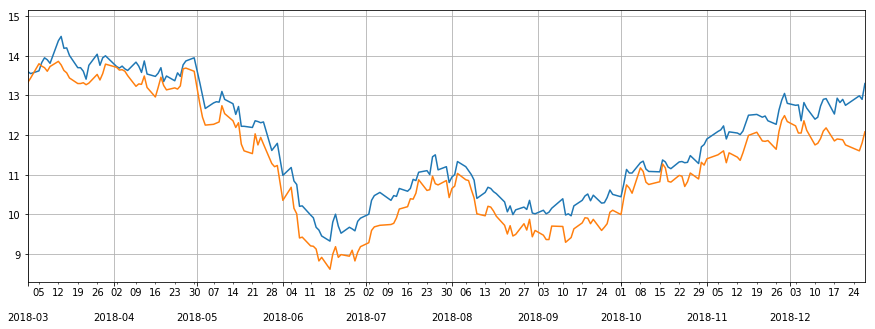

In [164]:
stock1 = pd.read_csv('HISTORICO_2018/ITSA3_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
stock2 = pd.read_csv('HISTORICO_2018/ITSA4_2018', index_col = 'DATA DO PREGAO', parse_dates=True)

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

fig, ax = plt.subplots()


ax.plot(stock1['PRECO FECHAMENTO'])
ax.plot(stock2['PRECO FECHAMENTO'])


title_stg = stock1['NOME RESUMIDO DA EMPRESA EMISSORA'].iloc[0] + ": " + stock1['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0]

ax.set_xlim(['2018-03-01', '2018-12-28'])
ax.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Razão do par - Gráfico a ser operado

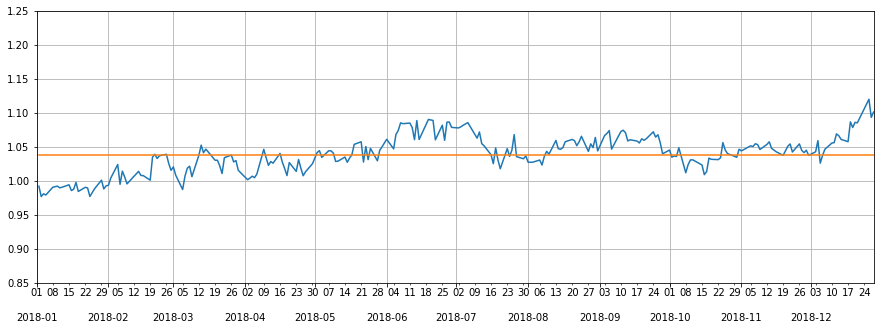

In [165]:
fig, ax = plt.subplots()

stock1['aux'] = stock1['PRECO FECHAMENTO'].mean()/stock2['PRECO FECHAMENTO'].mean()
ax.plot(stock1['PRECO FECHAMENTO']/stock2['PRECO FECHAMENTO'])
ax.plot(stock1['aux'])


ax.set_xlim(['2018-01-01', '2018-12-28'])
ax.set_ylim([.85, 1.25])

ax.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# GERANDO TABELA DE CADA PAR

In [75]:
for each in range(len(df_pares_on_pn)):
    stock1 = pd.read_csv('HISTORICO_2018/' + df_pares_on_pn.iloc[each]['Empresa1'] + '_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
    stock2 = pd.read_csv('HISTORICO_2018/' + df_pares_on_pn.iloc[each]['Empresa2'] + '_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
    df = pd.DataFrame()
    df['Empresa1'] = stock1['PRECO FECHAMENTO']
    df['Empresa2'] = stock2['PRECO FECHAMENTO']
    df['Par'] = stock1.iloc[0]['CODIGO DE NEGOCIACAO DO PAPEL'] + '_' + stock2.iloc[0]['CODIGO DE NEGOCIACAO DO PAPEL']
    df['Ratio'] = stock1['PRECO FECHAMENTO']/stock2['PRECO FECHAMENTO']
    df['MA_40'] = df['Ratio'].rolling(window=40).mean()
    df['STD_40'] = df['Ratio'].rolling(window=40).std()
    df['BANDA_1_40 SUPERIOR'] = df['MA_40'] + 2* df['STD_40']
    df['BANDA_1_40 INFERIOR'] = df['MA_40'] - 2* df['STD_40']
    df['BANDA_2_40 SUPERIOR'] = df['MA_40'] + 3* df['STD_40']
    df['BANDA_2_40 INFERIOR'] = df['MA_40'] - 3* df['STD_40']
    df['BANDA_3_40 SUPERIOR'] = df['MA_40'] + 4* df['STD_40']
    df['BANDA_3_40 INFERIOR'] = df['MA_40'] - 4* df['STD_40']
    df['PRECO FECHAMENTO'] = df['Ratio']
    save_dir = 'PARESLS/' + stock1['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0] + "_" + stock2['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0]
    df = df.reset_index()
    df.to_csv(save_dir,index=False)

In [76]:
df.tail()

,DATA DO PREGAO,Empresa1,Empresa2,Par,Ratio,MA_40,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR,PRECO FECHAMENTO
240,2018-12-20,19.05,14.51,LAME4_LAME3,1.312888,1.342875,0.011792,1.366459,1.319291,1.378252,1.307498,1.390044,1.295706,1.312888
241,2018-12-21,19.28,14.65,LAME4_LAME3,1.316041,1.342270,0.012529,1.367327,1.317213,1.379856,1.304684,1.392384,1.292155,1.316041
242,2018-12-26,19.06,14.55,LAME4_LAME3,1.309966,1.341240,0.013439,1.368117,1.314362,1.381556,1.300923,1.394994,1.287485,1.309966
243,2018-12-27,19.16,14.61,LAME4_LAME3,1.311431,1.340330,0.014193,1.368716,1.311945,1.382909,1.297752,1.397102,1.283559,1.311431
244,2018-12-28,19.70,15.03,LAME4_LAME3,1.310712,1.339516,0.014934,1.369384,1.309648,1.384318,1.294714,1.399252,1.279780,1.310712


In [77]:
df = pd.read_csv(save_dir, index_col = 'DATA DO PREGAO', parse_dates=True)
df.head()

,Empresa1,Empresa2,Par,Ratio,MA_40,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR,PRECO FECHAMENTO
DATA DO PREGAO,,,,,,,,,,,,,
2018-01-02,16.60,12.66,LAME4_LAME3,1.311216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.311216
2018-01-03,16.45,12.74,LAME4_LAME3,1.291209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.291209
2018-01-04,16.21,12.65,LAME4_LAME3,1.281423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.281423
2018-01-05,16.25,12.90,LAME4_LAME3,1.259690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.259690
2018-01-08,16.54,12.65,LAME4_LAME3,1.307510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.307510


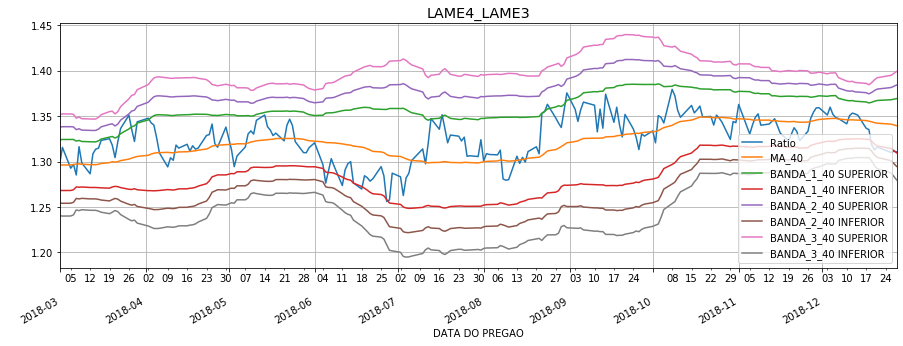

In [78]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

stock_plt = df[['Ratio','MA_40','BANDA_1_40 SUPERIOR','BANDA_1_40 INFERIOR','BANDA_2_40 SUPERIOR','BANDA_2_40 INFERIOR','BANDA_3_40 SUPERIOR','BANDA_3_40 INFERIOR']].plot
title_stg = df.iloc[0]['Par']

stock_plt = stock_plt.line(title = title_stg)

stock_plt.set_xlim(['2018-03-01', '2018-12-28'])
stock_plt.grid()
stock_plt.xaxis.set_major_locator(dates.MonthLocator())
stock_plt.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
stock_plt.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
stock_plt.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# TABELAS AUXILIARES DAS ESTRATEGIAS

In [79]:
df_pares = pd.read_csv('PARESLS/PARESONPN')

df = pd.DataFrame()
df['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']

df['ESTADO'] = 'PROCURANDO ENTRADA'
df['AUX'] = '0'
df['FROZEN'] = '0'


save_dir = 'STRATEGIES/LongShort'
df.to_csv(save_dir,index=False)
df

,CODIGO DE NEGOCIACAO DO PAPEL,ESTADO,AUX,FROZEN
0,ITSA4_ITSA3,PROCURANDO ENTRADA,0,0
1,ELET6_ELET3,PROCURANDO ENTRADA,0,0
2,ITUB3_ITUB4,PROCURANDO ENTRADA,0,0
3,PETR3_PETR4,PROCURANDO ENTRADA,0,0
4,LAME4_LAME3,PROCURANDO ENTRADA,0,0


# TABELAS DE REGISTRO OPERAÇÕES

In [80]:
df = pd.DataFrame()
df['CODIGO DE NEGOCIACAO DO PAPEL'] = ['']
df['DATA DO PREGAO'] = ['']
df['PRECO'] = ['']
df['OPERACAO'] = ['']

save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
df.head()

,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,,,,


# RESULTADO

In [81]:
# Pega ordens:
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
print(len(orders_df))
orders_df.head()

53


,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,ELET6_ELET3,2018-03-08,1.136293,BUY
1,ITSA4_ITSA3,2018-03-13,0.955935,BUY
2,ITUB3_ITUB4,2018-03-19,0.878291,SELL
3,ELET6_ELET3,2018-03-21,1.155458,SELL
4,ITSA4_ITSA3,2018-03-22,0.985647,SELL


# Plot exemplo da estratégia

In [82]:
# Pegando as ordens
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
orders_df = orders_df[df['CODIGO DE NEGOCIACAO DO PAPEL'] == 'ELET6_ELET3'].reset_index()
orders_df.head()

,index,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,0,ELET6_ELET3,2018-03-08,1.136293,BUY
1,3,ELET6_ELET3,2018-03-21,1.155458,SELL
2,8,ELET6_ELET3,2018-04-09,1.191733,SELL
3,11,ELET6_ELET3,2018-05-03,1.166973,BUY
4,14,ELET6_ELET3,2018-05-17,1.115211,BUY


In [83]:
# Pegando os dados
stock = pd.read_csv('PARESLS/ELET6_ELET3', index_col = 'DATA DO PREGAO', parse_dates=True)
stock['date_ax'] = stock.index
stock['date_ax'] = stock['date_ax'].apply(lambda date: date2num(date))


# Intervalo desejado
stock = stock.loc['2018-03-01' : '2018-12-28'].reset_index()

candle_values = [tuple(vals) for vals in stock[['date_ax', 'Ratio', 'Ratio', 'Ratio', 'Ratio']].values]


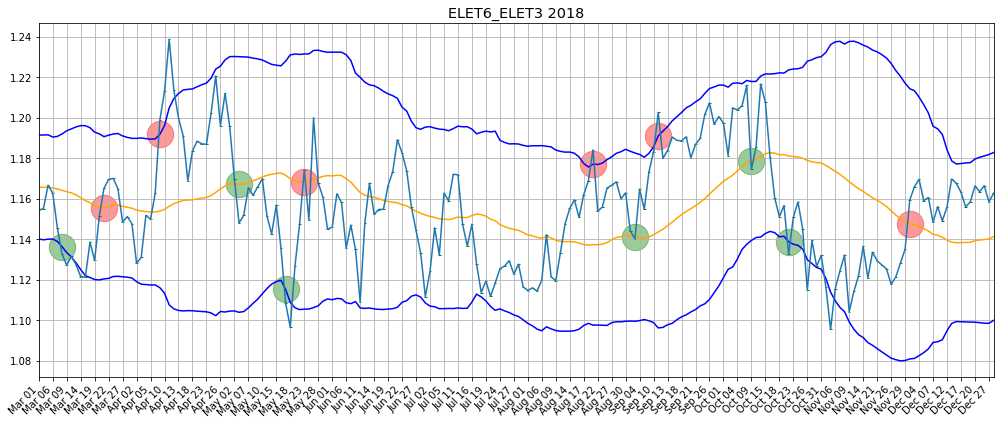

In [84]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(ncols=1, figsize=(14, 6))

# Parâmetros pro candle plot
fmt='%b %d'
freq=3
width=0.55
ohlc_data = candle_values

# Remover Final de Semana
# Convert data to numpy array 
ohlc_data_arr = np.array(ohlc_data)
ohlc_data_arr2 = np.hstack(
    [np.arange(ohlc_data_arr[:,0].size)[:,np.newaxis], ohlc_data_arr[:,1:]])
ndays = ohlc_data_arr2[:,0]  # array([0, 1, 2, ... n-2, n-1, n])

# Convert matplotlib date numbers to strings based on `fmt`
dates = mdates.num2date(ohlc_data_arr[:,0])
date_strings = []
for date in dates:
    date_strings.append(date.strftime(fmt))

# Plot candlestick chart
candle.candlestick_ohlc(ax, ohlc_data_arr2, width, colorup = 'g', colordown = 'r')
plt.grid()

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

# Plot indicadores
ax.plot(ohlc_data_arr2[:,0],stock['MA_40'], color = "orange")
ax.plot(ohlc_data_arr2[:,0],stock['BANDA_1_40 SUPERIOR'], color = "blue")
ax.plot(ohlc_data_arr2[:,0],stock['BANDA_1_40 INFERIOR'], color = "blue")

# Formating
ax.set_xticks(ndays[::freq])
ax.set_xticklabels(date_strings[::freq], rotation=45, ha='right', fontsize='medium')
ax.set_xlim(ndays.min(), ndays.max())
ax.set_title(stock['Par'].iloc[0] + " 2018")
plt.tight_layout()
plt.grid()

# Adjusting order index
new_order_id = []
order_id = 0
for each in range(len(stock)):
    if orders_df['DATA DO PREGAO'].iloc[order_id] == stock['DATA DO PREGAO'].iloc[each]:
        new_order_id.append(each)
        order_id = order_id + 1
    if order_id >= len(orders_df):
        break
    

# Plot ordens

for each_order in range(len(new_order_id)):
    if orders_df['OPERACAO'].iloc[each_order] == 'SELL':
        cor = 'red'
    else:
        cor = 'green'
    ax.scatter(new_order_id[each_order],orders_df['PRECO'].iloc[each_order], s=700, c=cor, alpha=.4)
plt.grid()

ax.plot(stock['Ratio'])

  

# Análise Qualitativa

In [85]:
# Pega ordens:
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
print(len(orders_df))
orders_df.head()

53


,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,ELET6_ELET3,2018-03-08,1.136293,BUY
1,ITSA4_ITSA3,2018-03-13,0.955935,BUY
2,ITUB3_ITUB4,2018-03-19,0.878291,SELL
3,ELET6_ELET3,2018-03-21,1.155458,SELL
4,ITSA4_ITSA3,2018-03-22,0.985647,SELL


In [86]:
# Pega id das ordens não fechadas
id_to_remove = []
pares = pd.read_csv('PARESLS/PARES')
for par in pares['Par']:
    df = orders_df[orders_df['CODIGO DE NEGOCIACAO DO PAPEL'] == par].reset_index()
    if len(df)%2:
        id_to_remove.append(df.iloc[len(df)-1]['index'])
id_to_remove

[50, 51, 52]

In [87]:
# Remove as ordens nao fechadas pelo id
lucro = 0
id_to_remove.sort(reverse=True)
for each_id in id_to_remove:
    orders_df = orders_df.drop(orders_df.index[each_id])
id_to_remove = []
print(len(orders_df))

50


In [91]:
# Armazena os lucros individuais de cada ordem

ordem_fechada = []
operacoes_prejuizo = 0
for par in pares['Par']:
    df = orders_df[orders_df['CODIGO DE NEGOCIACAO DO PAPEL'] == par].reset_index()
    for i in range(int(len(df)/2)):
        i = i*2
        if df.iloc[i]['OPERACAO'] == 'BUY':
            # Se eu comprei antes, lucro = venda futura - compra presente
            lucro = (df.iloc[i+1]['PRECO'] - df.iloc[i]['PRECO'])/df.iloc[i]['PRECO']
        else:
            # Se eu vendi antes, lucro = venda atual - compra futura
            lucro = (df.iloc[i]['PRECO'] - df.iloc[i+1]['PRECO'])/df.iloc[i]['PRECO']
        ordem_fechada.append(lucro*100)
        
        if lucro*100 < 0:
            print("Operacoes com prejuízo: " + str(round(lucro*100,2)) + "% em: " + df.iloc[i]['CODIGO DE NEGOCIACAO DO PAPEL'])
            operacoes_prejuizo = operacoes_prejuizo + 1
operacoes_prejuizo

Operacoes com prejuízo: -0.73% em: ITSA4_ITSA3
Operacoes com prejuízo: -2.3% em: PETR3_PETR4
Operacoes com prejuízo: -0.67% em: PETR3_PETR4


3

In [92]:
porcentagem_acerto = 100*(len(ordem_fechada) - operacoes_prejuizo)/len(ordem_fechada)
round(porcentagem_acerto,2)      
porcentagem_acerto = str(porcentagem_acerto) + '%'

Quantidade de ordens: 50
Quantidade de operações FECHADAS: 25
Média de lucro das ordens: 1.454120547500725
Somatório de lucro individual: 36.35301368751813
Operações com lucro: 22
Operações com prejuízo: 3
Porcentagem de acerto da estratégia: 88.0%


<BarContainer object of 25 artists>

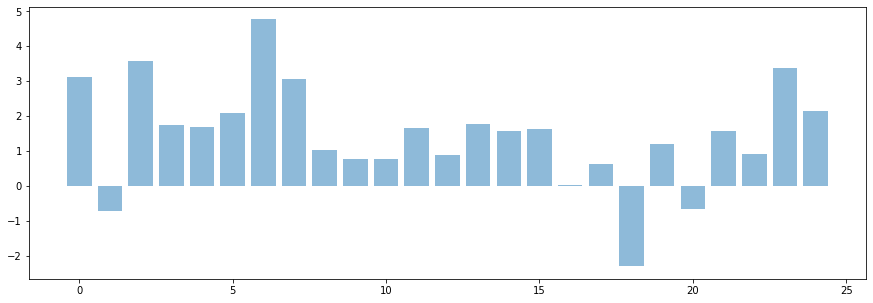

In [95]:
porcentagem_acerto = 100*(len(ordem_fechada) - operacoes_prejuizo)/len(ordem_fechada)
porcentagem_acerto = round(porcentagem_acerto,2)      
porcentagem_acerto = str(porcentagem_acerto) + '%'

print("Quantidade de ordens: " + str(len(ordem_fechada*2)))
print("Quantidade de operações FECHADAS: " + str(len(ordem_fechada)))
print("Média de lucro das ordens: " + str(sum(ordem_fechada)/len(ordem_fechada)))
print("Somatório de lucro individual: " + str(sum(ordem_fechada)))
print("Operações com lucro: " + str(len(ordem_fechada) - operacoes_prejuizo))
print("Operações com prejuízo: " + str(operacoes_prejuizo))
print("Porcentagem de acerto da estratégia: " + porcentagem_acerto)

x_values = np.arange(len(ordem_fechada))

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

plt.bar(x_values, ordem_fechada, align='center', alpha=0.5)

(array([1., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 1., 4., 2., 0., 5.,
        2., 2., 0., 0., 0., 2., 0., 2., 0., 0., 0., 0., 1.]),
 array([-2.30458551, -2.06872648, -1.83286745, -1.59700841, -1.36114938,
        -1.12529035, -0.88943132, -0.65357228, -0.41771325, -0.18185422,
         0.05400482,  0.28986385,  0.52572288,  0.76158191,  0.99744095,
         1.23329998,  1.46915901,  1.70501805,  1.94087708,  2.17673611,
         2.41259514,  2.64845418,  2.88431321,  3.12017224,  3.35603128,
         3.59189031,  3.82774934,  4.06360837,  4.29946741,  4.53532644,
         4.77118547]),
 <a list of 30 Patch objects>)

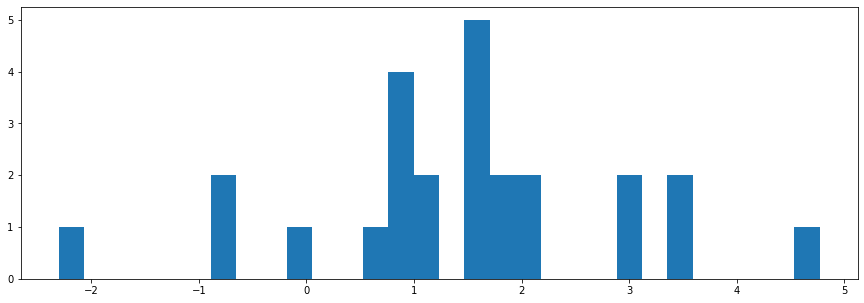

In [103]:
plt.hist(ordem_fechada,bins=30)

In [97]:
# Dataframe para auxilar no calculo da carteira ls

df_pares = pd.read_csv('PARESLS/PARES')

df_c_ls = pd.DataFrame()
df_c_ls['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
df_c_ls['ESTADO'] = 'FECHADA'
df_c_ls['CAPITAL ALOCADO'] = '0'
df_c_ls['QUANTIDADE PAPEL'] = '0'
df_c_ls = df_c_ls.set_index('CODIGO DE NEGOCIACAO DO PAPEL')
df_c_ls
# df_c_ls.loc['PETR3_PETR4']['ESTADO'] returns 'FECHADA'

,ESTADO,CAPITAL ALOCADO,QUANTIDADE PAPEL
CODIGO DE NEGOCIACAO DO PAPEL,,,
ITSA4_ITSA3,FECHADA,0,0
ELET6_ELET3,FECHADA,0,0
ITSA4_ITUB4,FECHADA,0,0
ITUB3_ITUB4,FECHADA,0,0
MYPK3_ARZZ3,FECHADA,0,0
...,...,...,...
SLCE3_GUAR3,FECHADA,0,0
PSSA3_SLCE3,FECHADA,0,0
PCAR4_ARZZ3,FECHADA,0,0


# Evolução da carteira - SALDO

In [98]:
# CONSIDERANDO QUE A VENDA DESCOBERTA(PONTA SHORT) VAI PUXAR 125% DE MARGEM E O PAPEL COMPRADO COM DESÁGIL DE 25%
# SE EU VENDO 100k DE 'A' E COMPRO 100K DE 'B', PRECISO DE 50K EM DINHEIRO COMO GARANTIA, PORQUE, NO TOTAL, A 
# GARANTIA SERÁ DE 50K EM DINHEIRO MAIS 75% de 100k DE 'B' = 50k + 0.75*100K = 125k QUE É O NECESSARIO PARA O
# ALUGUEL DE 'A'

In [99]:
# Carteira inicial R$ 1.000.000

melhor_carteira = 1000000
carteiras = {
             0: 0,
             0: 0,
}
for alocacao in range(300):
    alocacao = alocacao/100
    df_c_ls = pd.DataFrame()
    df_c_ls['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
    df_c_ls['ESTADO'] = 'FECHADA'
    df_c_ls['CAPITAL ALOCADO'] = '0'
    df_c_ls['QUANTIDADE PAPEL'] = '0'
    df_c_ls = df_c_ls.set_index('CODIGO DE NEGOCIACAO DO PAPEL')
    carteira = 1000000
    carteira_hist = [1000000]
    
    for i in range(len(orders_df)):

        order = orders_df.iloc[i]

        if df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] == 'FECHADA': # CALCULA ENTRADA
            disponivel = carteira * alocacao
            quantidade_papel = round(disponivel/order['PRECO'])
            investimento = quantidade_papel * order['PRECO']
            garantia = investimento/2
            if order['OPERACAO'] == 'BUY':
                carteira = carteira - garantia
            elif order['OPERACAO'] == 'SELL':
                carteira = carteira - garantia
            df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'ABERTA'
            df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO'] = investimento
            df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['QUANTIDADE PAPEL'] = quantidade_papel

        else:  # FECHA OPERACAO
            alocado = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO']
            garantia = alocado/2
            quantidade_papel = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['QUANTIDADE PAPEL']
            retorno = quantidade_papel * order['PRECO']
            lucro = retorno - alocado
            if order['OPERACAO'] == 'BUY':
                carteira = carteira + garantia - lucro
            elif order['OPERACAO'] == 'SELL':
                carteira = carteira + garantia + lucro
            df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'FECHADA'
        
        carteira_hist.append(carteira) 
        
        if carteira < 0: 
            break
    if carteira > 0: 
            carteiras.update({alocacao: carteira})
    if carteira > melhor_carteira:
        melhor_carteira = carteira
        best_alocacao = alocacao

print('best aloc: ' + str(best_alocacao))
print('Capital usado como garantia em cada operação:' + str(best_alocacao*100/2) + '%')
print('best carteira: ' + str(melhor_carteira))
# plt.plot(carteira_hist)
# df_c_ls

best aloc: 1.39
Capital usado como garantia em cada operação:69.5%
best carteira: 1189865.8429552475


,ESTADO,CAPITAL ALOCADO,QUANTIDADE PAPEL
CODIGO DE NEGOCIACAO DO PAPEL,,,
ITSA4_ITSA3,FECHADA,128956,132748
ELET6_ELET3,FECHADA,534468,469390
ITSA4_ITUB4,FECHADA,0,0
ITUB3_ITUB4,FECHADA,1.0512e+06,1.21457e+06
MYPK3_ARZZ3,FECHADA,0,0
...,...,...,...
SLCE3_GUAR3,FECHADA,0,0
PSSA3_SLCE3,FECHADA,0,0
PCAR4_ARZZ3,FECHADA,0,0


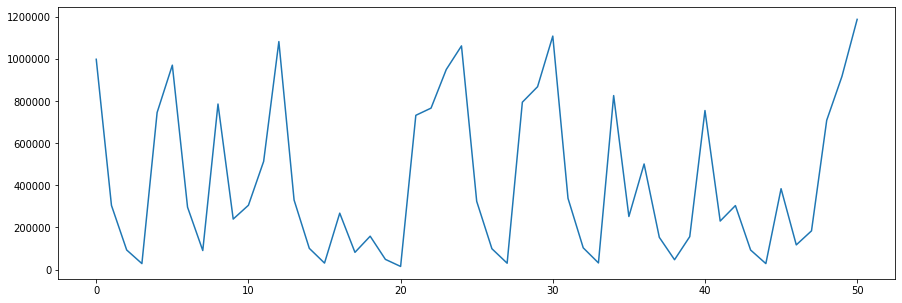

In [100]:
df_c_ls = pd.DataFrame()
df_c_ls['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
df_c_ls['ESTADO'] = 'FECHADA'
df_c_ls['CAPITAL ALOCADO'] = '0'
df_c_ls['QUANTIDADE PAPEL'] = '0'
df_c_ls = df_c_ls.set_index('CODIGO DE NEGOCIACAO DO PAPEL')
carteira = 1000000
carteira_hist = [1000000]
alocacao = best_alocacao

for i in range(len(orders_df)):

    order = orders_df.iloc[i]

    if df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] == 'FECHADA': # CALCULA ENTRADA
        disponivel = carteira * alocacao
        quantidade_papel = round(disponivel/order['PRECO'])
        investimento = quantidade_papel * order['PRECO']
        garantia = investimento/2
        if order['OPERACAO'] == 'BUY':
            carteira = carteira - garantia
        elif order['OPERACAO'] == 'SELL':
            carteira = carteira - garantia
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'ABERTA'
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO'] = investimento
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['QUANTIDADE PAPEL'] = quantidade_papel

    else:  # FECHA OPERACAO
        alocado = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO']
        garantia = alocado/2
        quantidade_papel = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['QUANTIDADE PAPEL']
        retorno = quantidade_papel * order['PRECO']
        lucro = retorno - alocado
        if order['OPERACAO'] == 'BUY':
            carteira = carteira + garantia - lucro
        elif order['OPERACAO'] == 'SELL':
            carteira = carteira + garantia + lucro
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'FECHADA'

    carteira_hist.append(carteira) 

plt.plot(carteira_hist)
df_c_ls

In [101]:
print('Melhor alocação em cada operação: ' + str(best_alocacao*100) + '%')
print('Capital usado como garantia em cada operação:' + str(best_alocacao*100/2) + '%')
print('Saldo final da carteira com todas operações fechadas: ' + str(melhor_carteira))
lucro = str( round(100*(melhor_carteira-carteira_hist[0])/carteira_hist[0],2) ) 
print('Lucro obtido em 9 meses: ' + lucro + '%') 

Melhor alocação em cada operação: 139.0%
Capital usado como garantia em cada operação:69.5%
Saldo final da carteira com todas operações fechadas: 1189865.8429552475
Lucro obtido em 9 meses: 18.99%


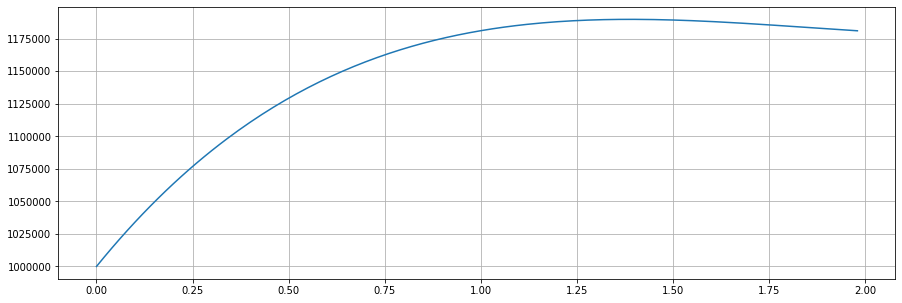

In [102]:
lists = sorted(carteiras.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)

plt.grid()


In [133]:
carteiras

{0: 1000000.0,
 0.01: 1001442.7259874623,
 0.02: 1002760.8587332161,
 0.03: 1003985.4254649361,
 0.04: 1005138.0161642397,
 0.05: 1006242.9579217619,
 0.06: 1007318.8247772225,
 0.07: 1008382.506367384,
 0.08: 1009446.9481043139,
 0.09: 1010526.203570038,
 0.1: 1011630.179442846,
 0.11: 1012768.9648576301,
 0.12: 1013949.199449286,
 0.13: 1015179.7781920925,
 0.14: 1016464.7621066739,
 0.15: 1017810.1972801473,
 0.16: 1019219.8258668475,
 0.17: 1020696.7774899092,
 0.18: 1022244.5427342905,
 0.19: 1023864.8509671818,
 0.2: 1025561.0247318422,
 0.21: 1027332.8955861526,
 0.22: 1029182.0315856398,
 0.23: 1031109.8280038908,
 0.24: 1033117.393465238,
 0.25: 1035202.2369962538,
 0.26: 1037367.8951679575,
 0.27: 1039611.9721980984,
 0.28: 1041934.1006035246,
 0.29: 1044336.3594384216,
 0.3: 1046814.8488030385,
 0.31: 1049370.2274603373,
 0.32: 1052001.3888679838,
 0.33: 1054709.708698169,
 0.34: 1057491.4665456435,
 0.35: 1060346.845734628,
 0.36: 1063275.2090228146,
 0.37: 1066274.82478052